# Creating a Module to Predict Charges

## Importing the Libraries needed to this project

In [47]:
# Import Libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Exploring my Dataset

In [48]:
# Read the CSV Dataset
df = pd.read_csv("insurance.csv")

In [49]:
# Show first 5 rows from the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [50]:
# Show dataset dimension
df.shape

(1338, 7)

In [51]:
# Show some information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [52]:
# Check how many null values are in the dataset
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [53]:
# Show count, mean, std, min, etc from dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [54]:
# Show how many region are in the dataset
set(df['region'])

{'northeast', 'northwest', 'southeast', 'southwest'}

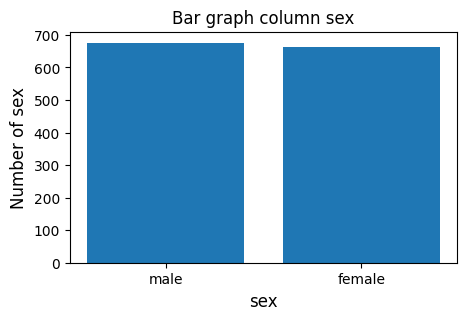

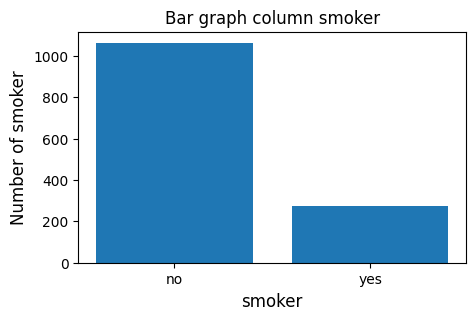

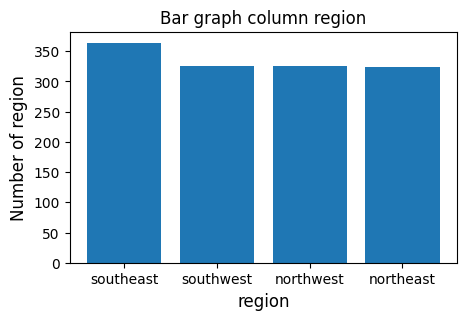

In [55]:
# Show bar graphs from count of sex, region and smoker
for col in df.select_dtypes(exclude=np.number).columns:
  count = df[col].value_counts()
  fig = plt.figure(figsize=(5, 3))
  plt.bar(count.index, count.values)
  plt.title(f'Bar graph column {col}')
  plt.ylabel(f'Number of {col}', fontsize = 12)
  plt.xlabel(col, fontsize = 12)
  plt.show()
  print("")

In [56]:
# Get numerical columns correlation
corr_matrix = df.corr(numeric_only=int)
print(corr_matrix)

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


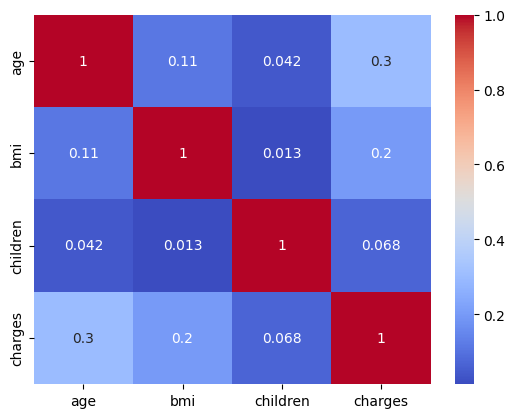

In [57]:
# Plot correlation heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

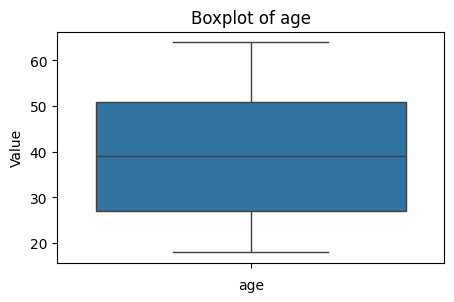

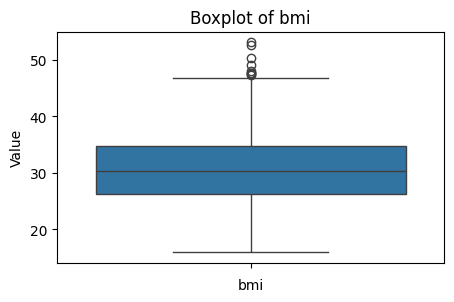

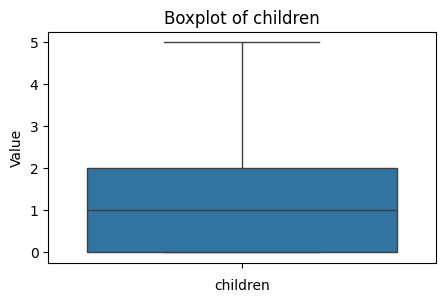

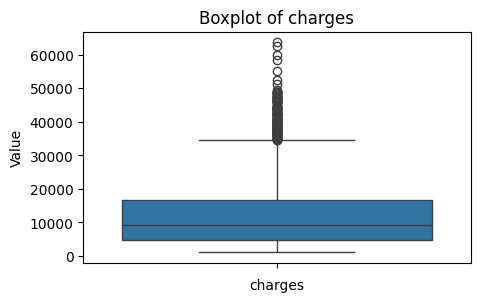

In [58]:
# Show boxplot from numerical values
for col in df.select_dtypes(include=np.number).columns:
  plt.figure(figsize=(5, 3))
  sns.boxplot(df[col])
  plt.title(f'Boxplot of {col}')
  plt.xlabel(col)
  plt.ylabel('Value')
  plt.show()
  print("")

## Creating Pipeline to adjust the dataset

In [59]:
# Create function to LabelEncoder the columns
def labelEncoderColumns(dataset, columns):
  label_encoder = LabelEncoder()
  df = dataset.copy()
  for col in columns:
    df[col] = label_encoder.fit_transform(df[col])
  return df

df = labelEncoderColumns(df, df.select_dtypes(exclude=np.number).columns)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [60]:
# Balance smoker and non-smoker
smote = SMOTE(random_state=42)

X = df.drop('smoker', axis=1)
y = df['smoker']

X_resampled, y_resampled = smote.fit_resample(X, y)
df = X_resampled
df['smoker'] = y_resampled

In [61]:
# Show smoker new value
df['smoker'].value_counts()

smoker
1    1064
0    1064
Name: count, dtype: int64

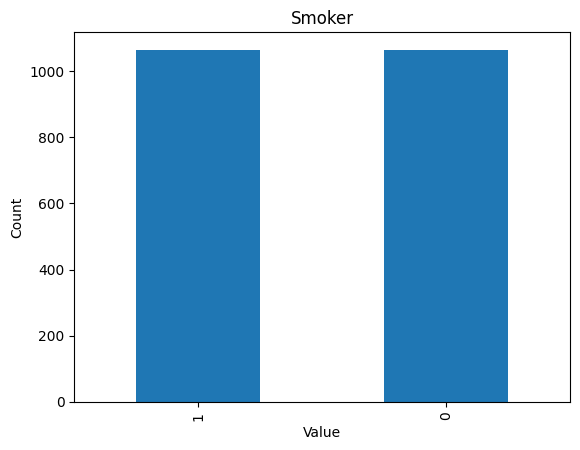

In [62]:
# Plot a bar graph of the new smoker column value
df['smoker'].value_counts().plot(kind='bar')
plt.title('Smoker')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [63]:
# Show dataset new dimension
df.shape

(2128, 7)

In [64]:
# Apply OneHotEncoder in the dataset
df = pd.get_dummies(data = df, columns = ['sex', 'smoker', 'region'])
df.head()

,age,bmi,children,charges,sex_0,sex_1,smoker_0,smoker_1,region_0,region_1,region_2,region_3
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [65]:
# Show dataset new dimension
df.shape

(2128, 12)

In [66]:
# Separate Dataset in train and test
X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(1702, 11) (426, 11)


In [67]:
# Create function to normalize the values
def normalize_columns(dataframe, column):
    data = dataframe[column]
    mini = min(data)
    maxi = max(data)

    new_data = []
    for value in data:
        new_data.append((value - mini)/(maxi - mini))

    dataframe[column] = new_data

numerical_columns = ['age', 'bmi', 'children']

for each_column in numerical_columns:
    normalize_columns(X_train, each_column)
    normalize_columns(X_test, each_column)

X_train.head()

,age,bmi,children,sex_0,sex_1,smoker_0,smoker_1,region_0,region_1,region_2,region_3
1233,0.869565,0.197471,0.0,False,True,True,False,False,False,False,True
480,0.978261,0.682405,0.6,False,True,True,False,False,True,False,False
1111,0.434783,0.603444,0.6,False,True,False,True,False,False,True,False
1303,0.543478,0.318536,0.0,False,True,False,True,False,False,False,True
861,0.434783,0.323917,0.6,True,False,True,False,False,False,False,True


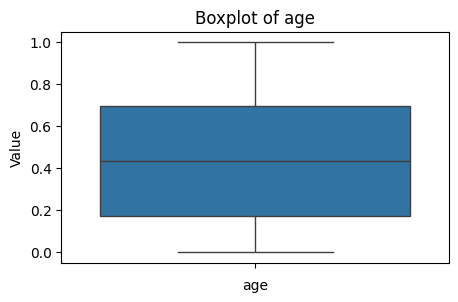

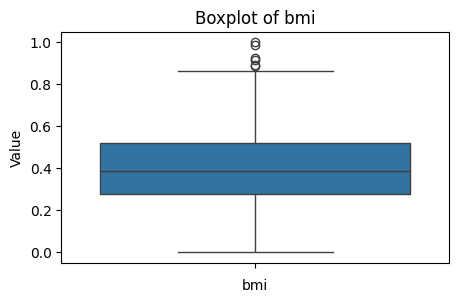

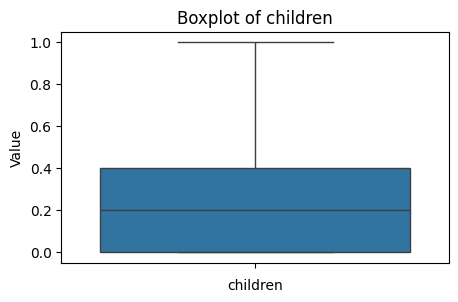

In [71]:
# Show boxplot from numerical values after normalization
for col in X_train.select_dtypes(include=np.number).columns:
  plt.figure(figsize=(5, 3))
  sns.boxplot(X_train[col])
  plt.title(f'Boxplot of {col}')
  plt.xlabel(col)
  plt.ylabel('Value')
  plt.show()
  print("")

## Training the Module

In [72]:
# Train the module using Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [73]:
# Train the module using Decision Tree
model_dtr = DecisionTreeRegressor(max_depth=5)
model_dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

## Reviwing the Training Results

In [76]:
# Review Linear Regression training results
predictions = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, predictions)
lin_rmse = np.sqrt(lin_mse)
print("Mean squared error: ", lin_rmse)

r2 = r2_score(y_test, predictions)
print('r²',r2)

Mean squared error:  6531.183401942502
r² 0.8181582625924231


In [77]:
# Review Decision Tree training results
predictions = model_dtr.predict(X_test)
lin_mse = mean_squared_error(y_test, predictions)
lin_rmse = np.sqrt(lin_mse)
print("Mean squared error: ", lin_rmse)

r2 = r2_score(y_test, predictions)
print('r²',r2)

Mean squared error:  4306.910681114301
r² 0.9209245733176754
